In [1]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('Data-PR-As2/Genes/data.csv')
labels = pd.read_csv('Data-PR-As2/Genes/labels.csv')

labels = labels.drop(labels='Unnamed: 0', axis=1)
data = data.drop(labels='Unnamed: 0', axis=1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

knn= KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2)  
knn.fit(X_train, y_train)  

d:\Programs\anaconda3\envs\UiML\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [21]:
print(X_test.shape)
y_pred = knn.predict(X_test)

cm= confusion_matrix(y_test, y_pred, labels=labels['Class'].unique()) 
cm

(161, 20531)


array([[30,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0],
       [ 0,  0, 65,  0,  0],
       [ 0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  9]], dtype=int64)

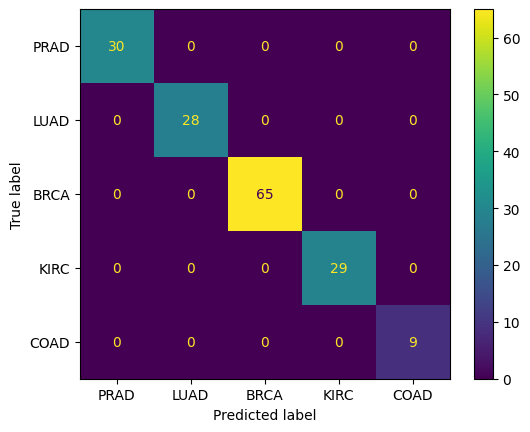

In [22]:
disp = ConfusionMatrixDisplay(cm, display_labels=labels['Class'].unique())
disp.plot()